# Allen Byrd & Joshua Johnson assisted throuhgout this notebook

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

In [2]:
movie_gross = pd.read_csv('../../data/zippedData/bom.movie_gross.csv.gz')
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [5]:
movie_gross['foreign_gross']= movie_gross['foreign_gross'].str.replace(',','')
movie_gross['domestic_gross'] = pd.to_numeric(movie_gross['domestic_gross'])
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'])
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].fillna(movie_gross['domestic_gross'].median())
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(movie_gross['foreign_gross'].median())
movie_gross = movie_gross.dropna()

In [6]:
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [7]:
info = movie_gross[['title','domestic_gross','foreign_gross']]
info.head()

,title,domestic_gross,foreign_gross
0,Toy Story 3,415000000.0,652000000.0
1,Alice in Wonderland (2010),334200000.0,691300000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0
3,Inception,292600000.0,535700000.0
4,Shrek Forever After,238700000.0,513900000.0


In [8]:
movie_info = pd.read_csv('../../data/zippedData/rt.movie_info.tsv.gz', sep='\t')
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [9]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [10]:
movie_info.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [11]:
movie_info = movie_info.drop(['box_office', 'dvd_date', 'theater_date', 'studio'], axis=1)
movie_info['writer'] = movie_info['writer'].fillna('Unknown')
movie_info['director'] = movie_info['director'].fillna('Unknown')
movie_info['synopsis'] = movie_info['synopsis'].fillna('Unknown')
movie_info = movie_info.dropna()

In [12]:
movie_info.isna().sum()

id          0
synopsis    0
rating      0
genre       0
director    0
writer      0
currency    0
runtime     0
dtype: int64

In [13]:
genre = movie_info.loc[(movie_info['genre'].str.contains('Drama')) & (movie_info['director'].count() > 14) , ['genre', 'rating', 'director', 'writer']]
genre

,genre,rating,director,writer
1,Drama|Science Fiction and Fantasy,R,David Cronenberg,David Cronenberg|Don DeLillo
7,Drama,R,Ray Lawrence,Raymond Carver|Beatrix Christian
8,Drama,R,Taylor Hackford,Mark Jacobson
15,Comedy|Drama|Mystery and Suspense,R,George Hickenlooper,Norman Snider
16,Drama,R,Unknown,Unknown
...,...,...,...,...
1526,Comedy|Drama,PG-13,Ridley Scott,Nicholas Griffin|Ted Griffin
1530,Comedy|Drama,PG,Cameron Crowe,Aline Brosh McKenna|Cameron Crowe
1536,Drama|Romance,NR,Vikramaditya Motwane,Vikramaditya Motwane|Bhavani Iyer|Anurag Kashyap
1542,Comedy|Drama,NR,Gauri Shinde,Gauri Shinde


In [14]:
directors = movie_info.groupby(['director']).size()
directors.sort_values(ascending=False)

director
Unknown                           41
Clint Eastwood                     4
Barry Levinson                     2
Kasi Lemmons                       2
Steven Spielberg                   2
                                  ..
Michel Gondry                      1
Michael Tiddes                     1
Michael Showalter                  1
Michael Salomon|Mikael Salomon     1
Adam Ravetch|Sarah Robertson       1
Length: 274, dtype: int64

In [15]:
genres = movie_info.groupby(['genre']).size()
genres.sort_values(ascending=False)

genre
Drama                                                                                        47
Comedy                                                                                       39
Comedy|Drama                                                                                 26
Drama|Mystery and Suspense                                                                   13
Comedy|Drama|Romance                                                                         11
                                                                                             ..
Art House and International|Drama|Horror|Mystery and Suspense|Science Fiction and Fantasy     1
Art House and International|Documentary|Drama|Special Interest                                1
Art House and International|Documentary                                                       1
Art House and International|Comedy|Romance                                                    1
Action and Adventure              

<AxesSubplot:>

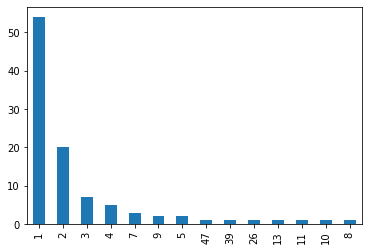

In [16]:
genres.value_counts().plot(kind='bar')

In [17]:
movie_reviews = pd.read_table('../../data/zippedData/rt.reviews.tsv.gz', sep='\t', encoding='unicode_escape')
movie_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [18]:
tmbd_movie = pd.read_csv('../../data/zippedData/tmdb.movies.csv.gz')
tmbd_movie.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [19]:
tmbd_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [20]:
tmbd_movie.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [21]:
score = tmbd_movie[['title','popularity','vote_count', 'vote_average']]
score.head()

,title,popularity,vote_count,vote_average
0,Harry Potter and the Deathly Hallows: Part 1,33.533,10788,7.7
1,How to Train Your Dragon,28.734,7610,7.7
2,Iron Man 2,28.515,12368,6.8
3,Toy Story,28.005,10174,7.9
4,Inception,27.920,22186,8.3


<AxesSubplot:>

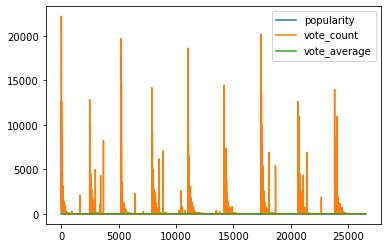

In [22]:
score.plot()

In [23]:
movie_budget = pd.read_csv('../../data/zippedData/tn.movie_budgets.csv.gz')
movie_budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [24]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [25]:
movie_budget.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [26]:
budget = movie_budget[['movie','production_budget','domestic_gross', 'worldwide_gross']]
budget.head()

,movie,production_budget,domestic_gross,worldwide_gross
0,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [27]:
import sqlite3 
import pandas as pd
conn = sqlite3.connect('../../data/zippedData/im.db')

In [28]:
imbd = pd.read_sql("""
SELECT DISTINCT mb.primary_title, mb.genres,  p.primary_name as director
FROM movie_basics as mb,
directors as d on d.movie_id = mb.movie_id,
persons as p on d.person_id = p.person_id
; """, conn)
imbd

,primary_title,genres,director
0,Sunghursh,"Action,Crime,Drama",Harnam Singh Rawail
1,One Day Before the Rainy Season,"Biography,Drama",Mani Kaul
2,The Other Side of the Wind,Drama,Orson Welles
3,Sabse Bada Sukh,"Comedy,Drama",Hrishikesh Mukherjee
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy",Raoul Ruiz
...,...,...,...
163103,Rodolpho Teóphilo - O Legado de um Pioneiro,Documentary,Ana Célia de Oliveira
163104,Dankyavar Danka,Comedy,Kanchan Nayak
163105,6 Gunn,None,Kiran Gawade
163106,Chico Albuquerque - Revelações,Documentary,Vinicius Augusto Bozzo


In [29]:
joins = movie_budget.set_index('movie').join(imbd.set_index('primary_title'), how='inner')
joins.reset_index(inplace=True)
joins.groupby('id').first()
joins

,index,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director
0,#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,"Crime,Drama,Horror",Tara Subkoff
1,10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422","Drama,Horror,Mystery",Dan Trachtenberg
2,10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",Drama,Timothy Hines
3,12 Rounds,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648","Action,Drama,Romance",Gabriel Soriano
4,12 Strong,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378","Action,Drama,History",Nicolai Fuglsig
...,...,...,...,...,...,...,...,...
4162,Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Byron Howard
4163,Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Rich Moore
4164,Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Jared Bush
4165,Zulu,82,"Dec 31, 2013","$16,000,000",$0,"$1,844,228","Crime,Drama,Thriller",Jérôme Salle


In [30]:
joins = joins.groupby('index').nth(0)
joins

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director
index,,,,,,,
#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,"Crime,Drama,Horror",Tara Subkoff
10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422","Drama,Horror,Mystery",Dan Trachtenberg
10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",Drama,Timothy Hines
12 Rounds,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648","Action,Drama,Romance",Gabriel Soriano
12 Strong,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378","Action,Drama,History",Nicolai Fuglsig
...,...,...,...,...,...,...,...
Zoolander 2,64,"Feb 12, 2016","$50,000,000","$28,848,693","$55,348,693",Comedy,Ben Stiller
Zoom,26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188","Animation,Comedy,Drama",Pedro Morelli
Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Byron Howard


In [31]:
joins['genres'] = joins['genres'].str.split(",")
joins['genres'] = joins['genres'].fillna('Unknown')
for x in range(joins['genres'].count()):
    if joins['genres'][x] == 'Unknown':
        joins['genres'][x] = 'Unknown'
    else:
        joins['genres'][x] = joins['genres'][x][0]
        x +=1
joins

<ipython-input-31-608fd6d50ce4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joins['genres'][x] = joins['genres'][x][0]
<ipython-input-31-608fd6d50ce4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joins['genres'][x] = 'Unknown'


,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director
index,,,,,,,
#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,Crime,Tara Subkoff
10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422",Drama,Dan Trachtenberg
10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",Drama,Timothy Hines
12 Rounds,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648",Action,Gabriel Soriano
12 Strong,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378",Action,Nicolai Fuglsig
...,...,...,...,...,...,...,...
Zoolander 2,64,"Feb 12, 2016","$50,000,000","$28,848,693","$55,348,693",Comedy,Ben Stiller
Zoom,26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188",Animation,Pedro Morelli
Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616",Adventure,Byron Howard


In [32]:
joins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2298 entries, #Horror to xXx: Return of Xander Cage
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 2298 non-null   int64 
 1   release_date       2298 non-null   object
 2   production_budget  2298 non-null   object
 3   domestic_gross     2298 non-null   object
 4   worldwide_gross    2298 non-null   object
 5   genres             2298 non-null   object
 6   director           2298 non-null   object
dtypes: int64(1), object(6)
memory usage: 223.6+ KB


In [33]:
joins['domestic_gross']= joins['domestic_gross'].str.replace(',','')
joins['domestic_gross']= joins['domestic_gross'].str.replace('$','')
joins['domestic_gross'] = pd.to_numeric(joins['domestic_gross'])
joins['worldwide_gross']= joins['worldwide_gross'].str.replace(',','')
joins['worldwide_gross']= joins['worldwide_gross'].str.replace('$','')
joins['worldwide_gross'] = pd.to_numeric(joins['worldwide_gross'])
joins['production_budget']= joins['production_budget'].str.replace(',','')
joins['production_budget']= joins['production_budget'].str.replace('$','')
joins['production_budget'] = pd.to_numeric(joins['production_budget'])

In [34]:
joins

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director
index,,,,,,,
#Horror,16,"Nov 20, 2015",1500000,0,0,Crime,Tara Subkoff
10 Cloverfield Lane,54,"Mar 11, 2016",5000000,72082999,108286422,Drama,Dan Trachtenberg
10 Days in a Madhouse,48,"Nov 11, 2015",12000000,14616,14616,Drama,Timothy Hines
12 Rounds,37,"Mar 27, 2009",20000000,12234694,17306648,Action,Gabriel Soriano
12 Strong,64,"Jan 19, 2018",35000000,45819713,71118378,Action,Nicolai Fuglsig
...,...,...,...,...,...,...,...
Zoolander 2,64,"Feb 12, 2016",50000000,28848693,55348693,Comedy,Ben Stiller
Zoom,26,"Aug 11, 2006",35000000,11989328,12506188,Animation,Pedro Morelli
Zootopia,57,"Mar 4, 2016",150000000,341268248,1019429616,Adventure,Byron Howard


In [35]:
joins['profit'] = joins['worldwide_gross'] - joins['production_budget']

In [36]:
joins = joins.sort_values('profit', ascending=False)
joins

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director,profit
index,,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,Horror,Atsushi Wada,2351345279
Titanic,43,"Dec 19, 1997",200000000,659363944,2208208395,Adventure,Pete Meads,2008208395
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,Action,Anthony Russo,1748134200
Jurassic World,34,"Jun 12, 2015",215000000,652270625,1648854864,Action,Colin Trevorrow,1433854864
Furious 7,67,"Apr 3, 2015",190000000,353007020,1518722794,Action,James Wan,1328722794
...,...,...,...,...,...,...,...,...
Call of the Wild,36,"Feb 21, 2020",82000000,0,0,Adventure,Chris Sanders,-82000000
Bright,80,"Dec 13, 2017",90000000,0,0,Action,David Ayer,-90000000
Men in Black: International,42,"Jun 14, 2019",110000000,3100000,3100000,Action,F. Gary Gray,-106900000


In [37]:
joins['profit'].median()

10376922.0

In [38]:
joins.loc[joins['profit'] > 10376922.0].tail()

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director,profit
index,,,,,,,,
Hot Pursuit,79,"May 8, 2015",35000000,34580201,45671512,Action,Anne Fletcher,10671512
The Lunchbox,42,"Feb 28, 2014",1700000,4231500,12231500,Drama,Ritesh Batra,10531500
Fright Night,58,"Aug 19, 2011",30000000,18298649,40520649,Comedy,Craig Gillespie,10520649
The Sessions,33,"Oct 19, 2012",1000000,6002451,11495204,Biography,Ben Lewin,10495204
Valentine,3,"Feb 2, 2001",10000000,20384136,20384136,Action,Ubay Fox,10384136


In [39]:
joins['genres'].value_counts()

Action         539
Drama          494
Comedy         415
Adventure      200
Biography      149
Horror         137
Documentary    129
Crime          120
Thriller        31
Animation       21
Unknown         12
Sci-Fi           9
Fantasy          8
Mystery          7
Family           7
Romance          5
Musical          4
Music            4
War              3
Sport            2
Western          2
Name: genres, dtype: int64

In [40]:
joins['director'].value_counts()

Steven Spielberg      8
Ridley Scott          6
David Gordon Green    6
Denis Villeneuve      6
Jon M. Chu            6
                     ..
Michael Courtney      1
Charlotte Sieling     1
Rick DeYoung          1
Jim Chuchu            1
Ian Sharp             1
Name: director, Length: 1783, dtype: int64

In [41]:
mean = joins['director'].value_counts().mean()
std = joins['director'].value_counts().std()
mean, std

(1.2888390353337071, 0.7363604101588771)

In [42]:
print((mean - (3 * std), mean + (3 * std)))

(-0.9202421951429243, 3.4979202658103388)


In [43]:
mean_profit = joins['profit'].mean()
std_profit = joins['profit'].std()
mean_profit, std_profit

(72947804.23803307, 176596076.0330572)

In [44]:
print((mean_profit - (3 * std_profit), mean_profit + (3 * std_profit)))

(-456840423.8611386, 602736032.3372047)


C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

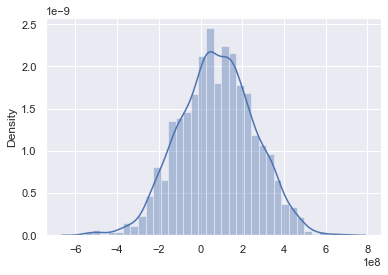

In [45]:
d1 = np.random.normal(mean_profit, std_profit, 2298)
sns.set_theme(font_scale=1)
sns.distplot(d1)

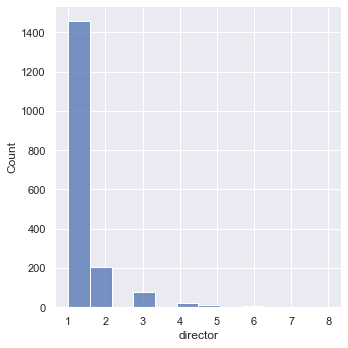

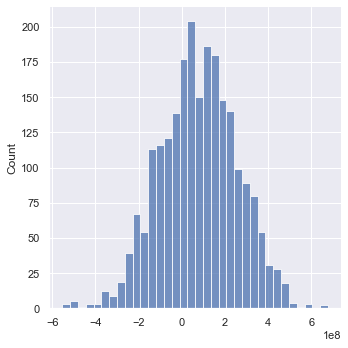

In [46]:
sns.displot(joins['director'].value_counts())
sns.displot(d1)

# Joshua Johnson & Allen Byrd assisted throughout the genre data analysis portion of this project

In [47]:
mean = joins['genres'].value_counts().mean()
std = joins['genres'].value_counts().std()
mean, std

(109.42857142857143, 168.69930984700898)

C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genres', ylabel='profit'>

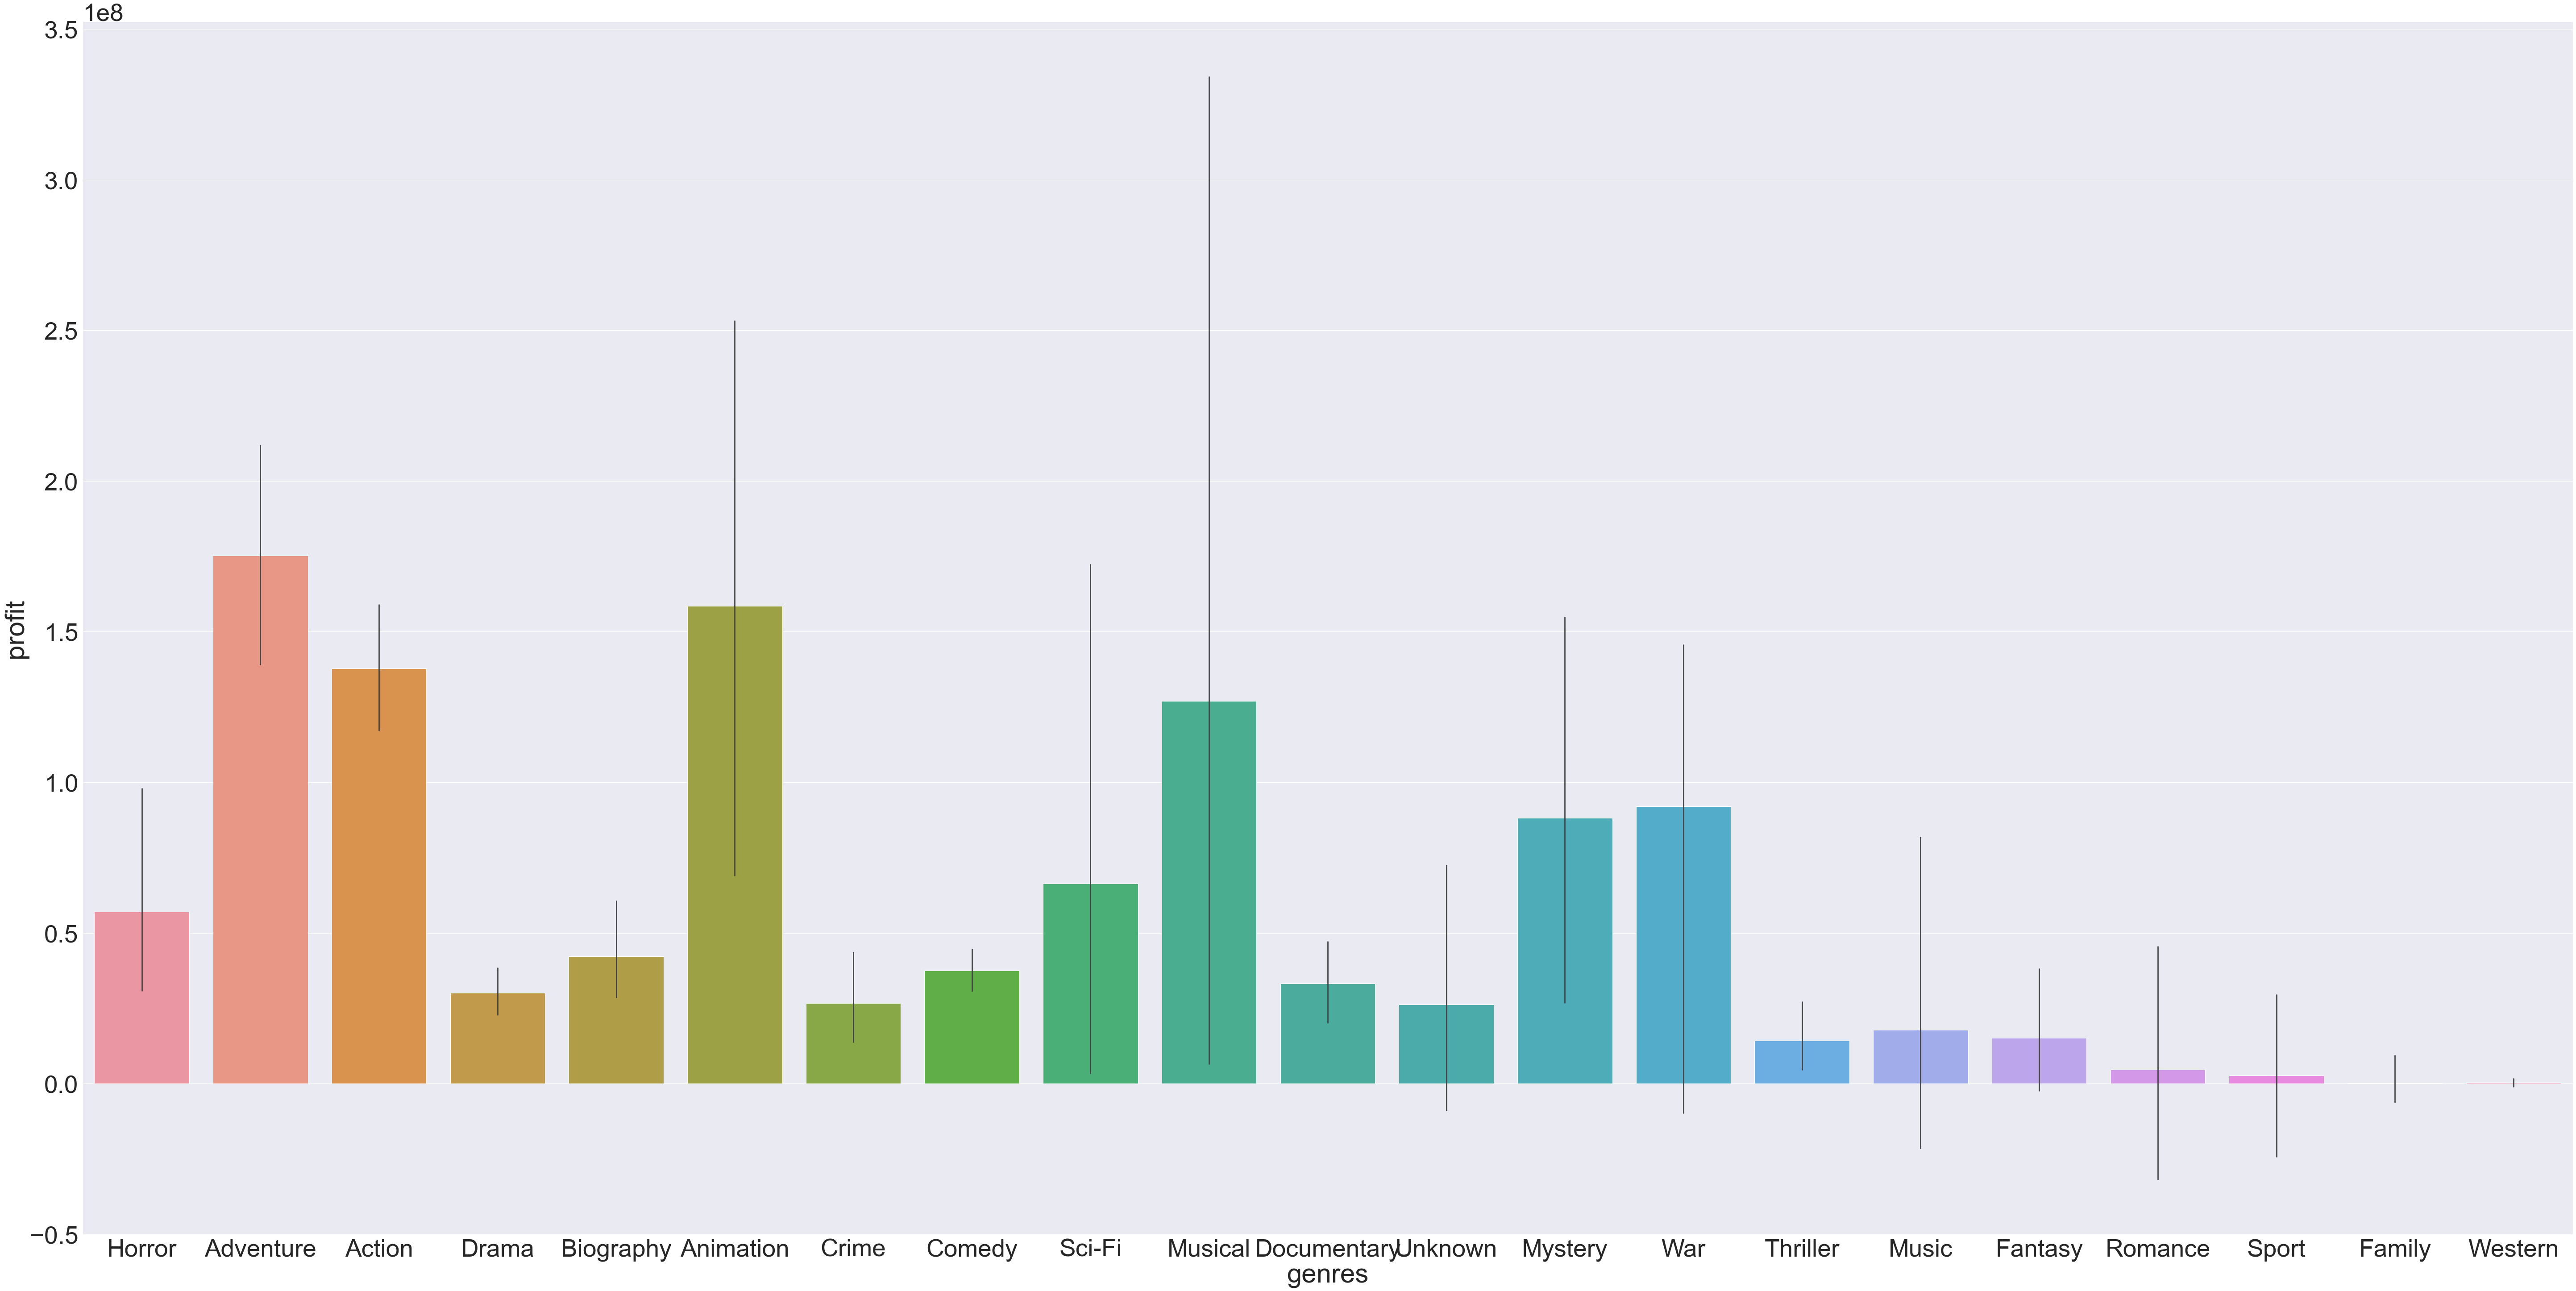

In [48]:
plt.figure(figsize=(100,50))
sns.set_theme(font_scale=5)
sns.barplot(joins['genres'], joins['profit'])

C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

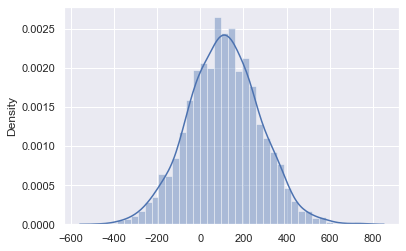

In [49]:
d2 = np.random.normal(mean, std, 2298)
sns.set_theme(font_scale=1)
sns.distplot(d2)

C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='director', ylabel='profit'>

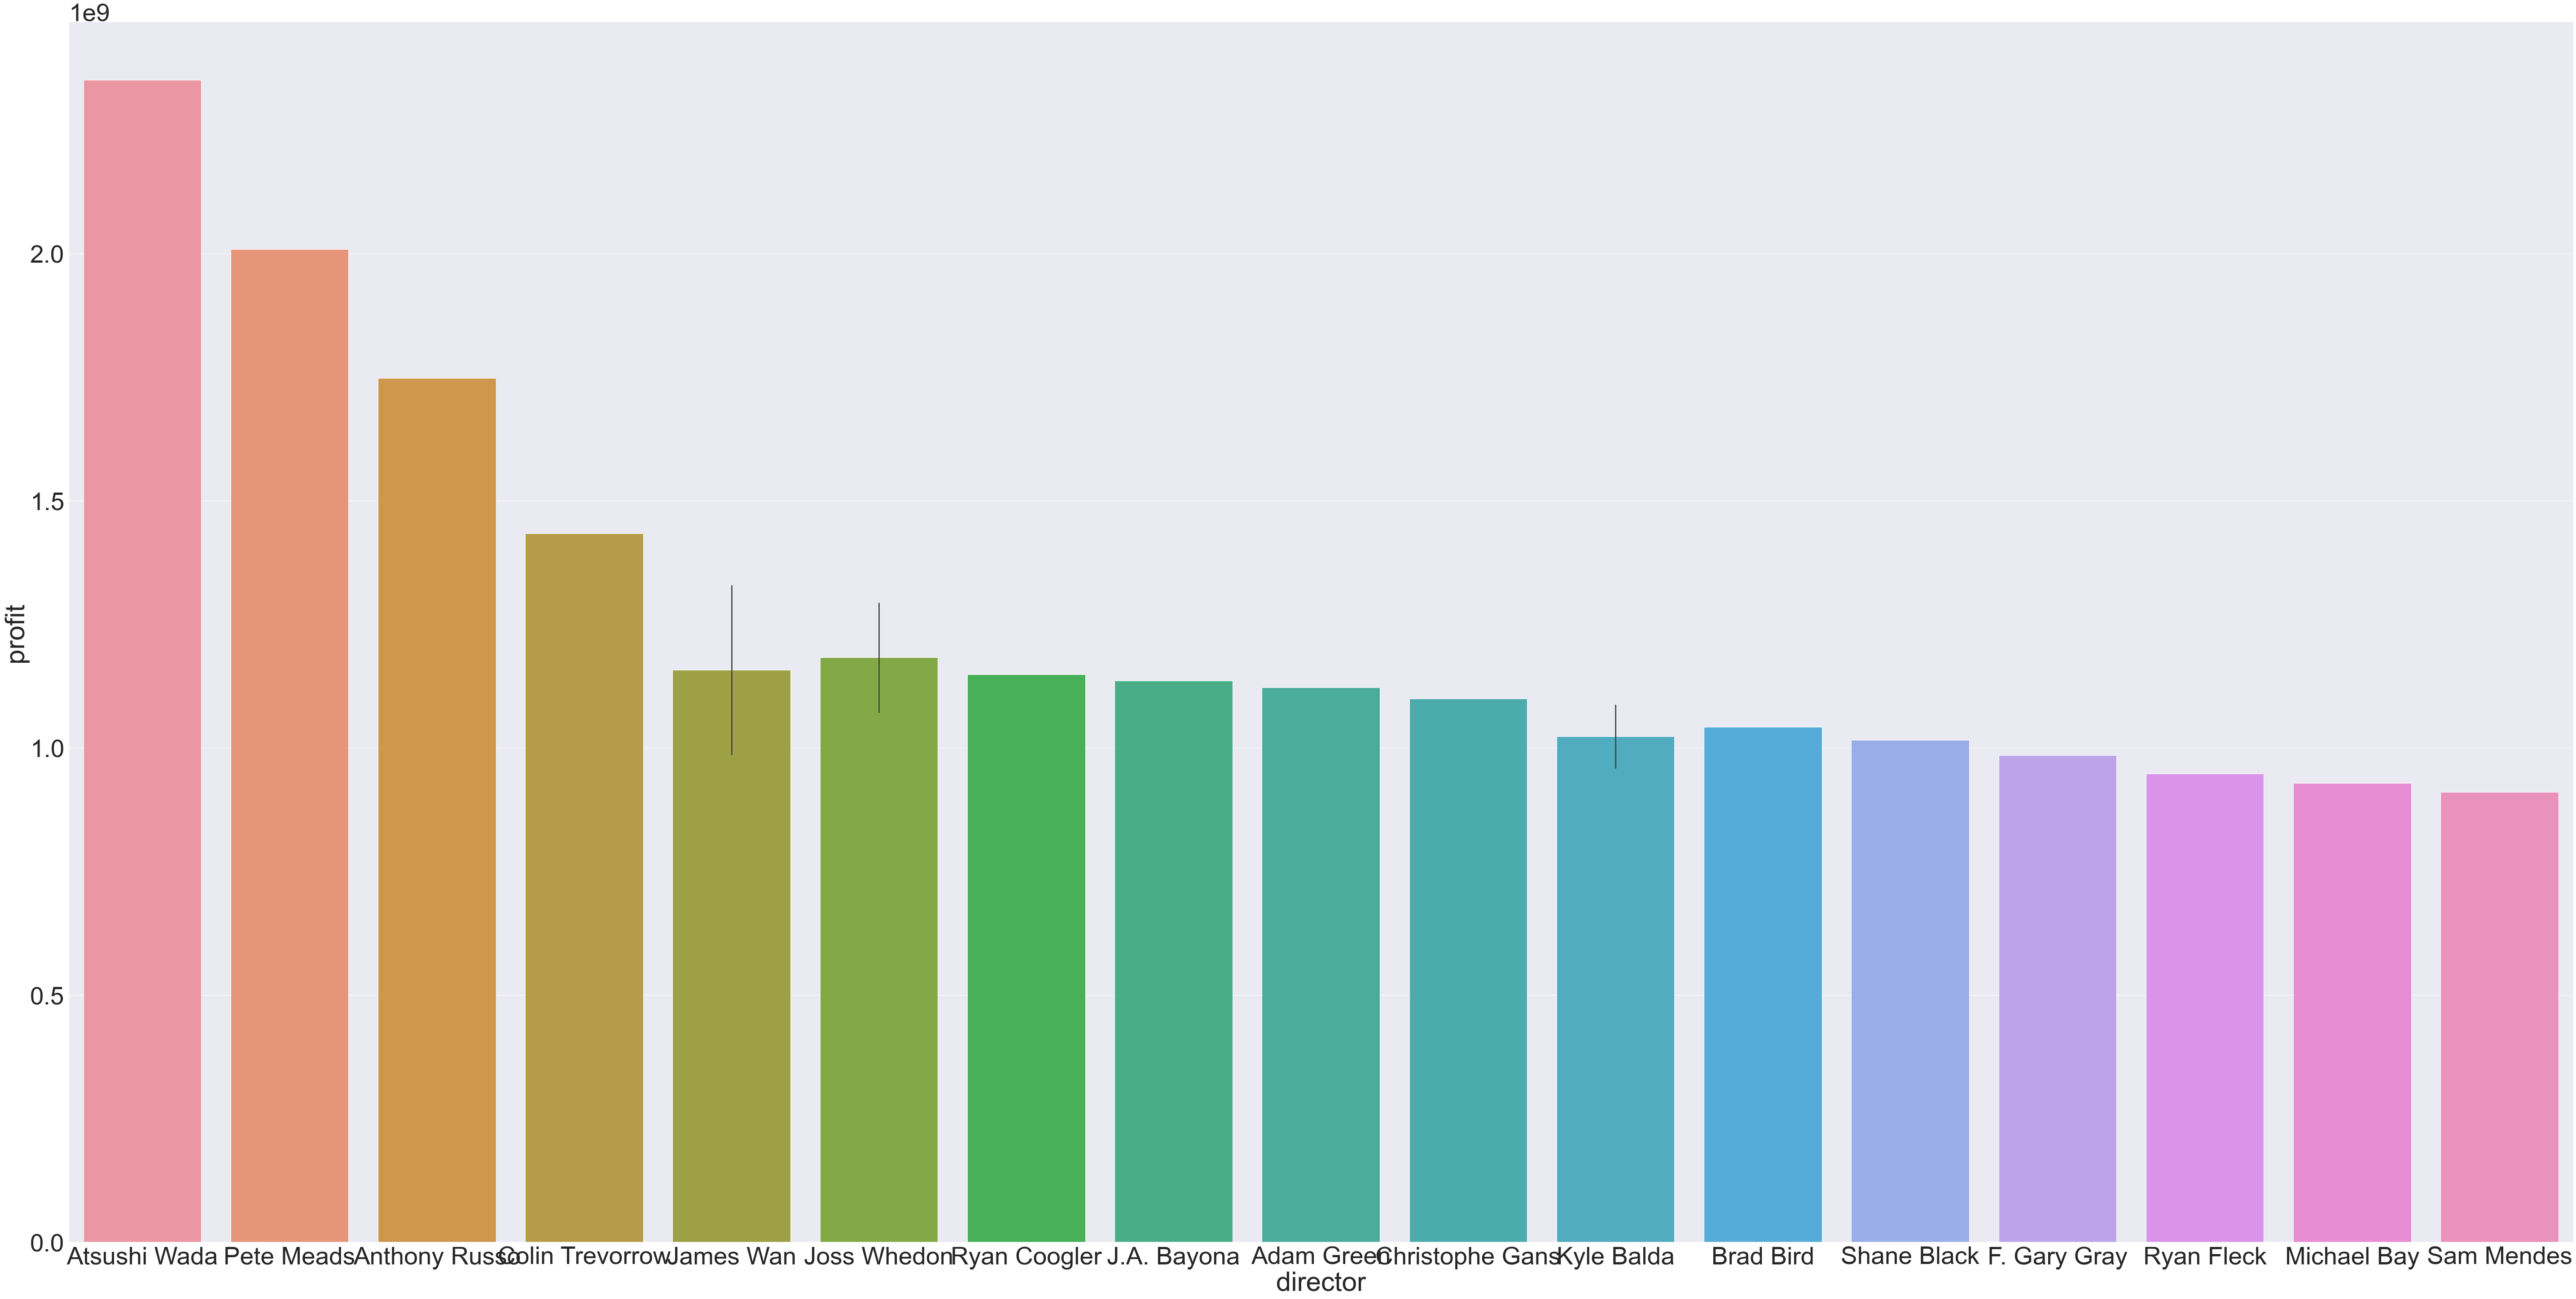

In [50]:
plt.figure(figsize=(100,50))
sns.set_theme(font_scale=5)
sns.barplot(joins['director'].head(20), joins['profit'].head(20))

C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='director', ylabel='production_budget'>

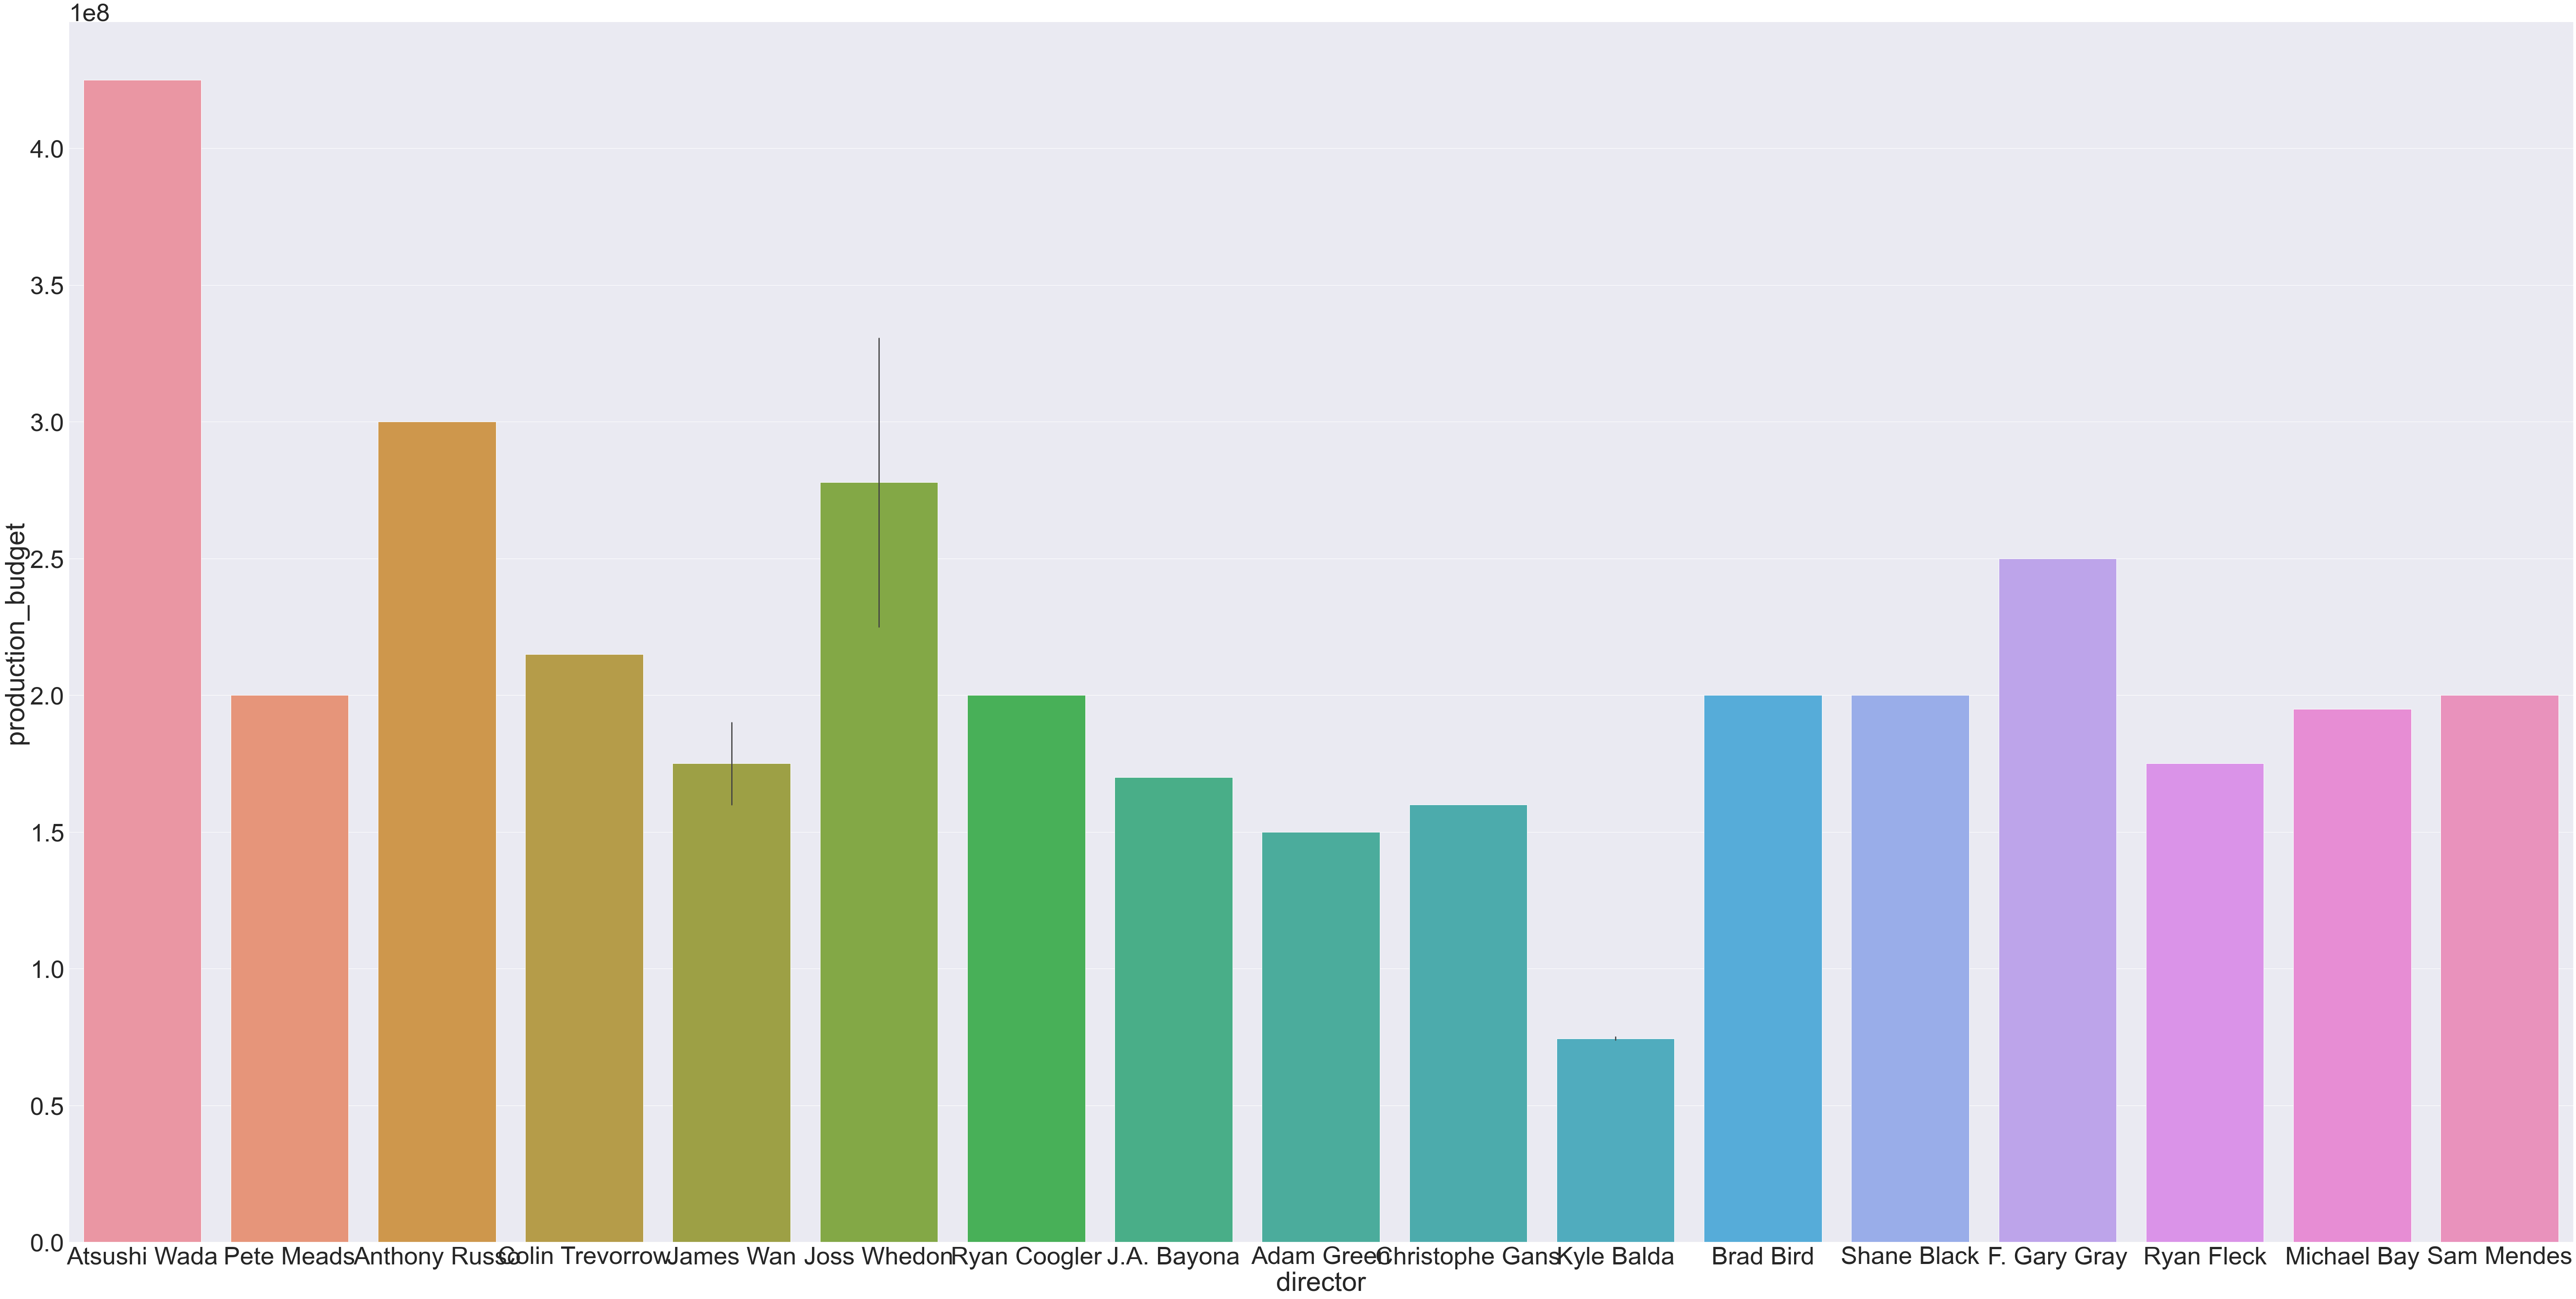

In [51]:
plt.figure(figsize=(100,50))
sns.barplot(joins['director'].head(20), joins['production_budget'].head(20))

In [52]:
test = joins.copy()
test

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director,profit
index,,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,Horror,Atsushi Wada,2351345279
Titanic,43,"Dec 19, 1997",200000000,659363944,2208208395,Adventure,Pete Meads,2008208395
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,Action,Anthony Russo,1748134200
Jurassic World,34,"Jun 12, 2015",215000000,652270625,1648854864,Action,Colin Trevorrow,1433854864
Furious 7,67,"Apr 3, 2015",190000000,353007020,1518722794,Action,James Wan,1328722794
...,...,...,...,...,...,...,...,...
Call of the Wild,36,"Feb 21, 2020",82000000,0,0,Adventure,Chris Sanders,-82000000
Bright,80,"Dec 13, 2017",90000000,0,0,Action,David Ayer,-90000000
Men in Black: International,42,"Jun 14, 2019",110000000,3100000,3100000,Action,F. Gary Gray,-106900000


In [53]:
test['genres'].value_counts()

Action         539
Drama          494
Comedy         415
Adventure      200
Biography      149
Horror         137
Documentary    129
Crime          120
Thriller        31
Animation       21
Unknown         12
Sci-Fi           9
Fantasy          8
Mystery          7
Family           7
Romance          5
Musical          4
Music            4
War              3
Sport            2
Western          2
Name: genres, dtype: int64

Two-Sample T-Test Example

In [54]:
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return (np.sum((sample - sample_mean) ** 2) / (len(sample) - 1))

In [55]:
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var1, var2 = sample_variance(sample1), sample_variance(sample2)
    return (((n_1 -1) * var1 + (n_2 -1) * var2) / ((n_1 + n_2) -2))

In [56]:
def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_exp, n_ctrl = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    den = np.sqrt(pool_var * ((1 / n_exp) + (1 / n_ctrl)))
    return (num / den)

In [57]:
adventure_profit = test.loc[test['genres'] == 'Adventure']
adventure_test = adventure_profit['profit'].array
adventure_test

<PandasArray>
[2008208395, 1122469910, 1086336173,  959727750,  906914868,  899216835,
  869429616,  868879522,  825491110,  821215193,
 ...
  -22773374,  -23328075,  -23878362,  -24856944,  -25000000,  -34421457,
  -35851512,  -49800000,  -82000000, -110450242]
Length: 200, dtype: int64

In [58]:
adventure_profit

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director,profit
index,,,,,,,,
Titanic,43,"Dec 19, 1997",200000000,659363944,2208208395,Adventure,Pete Meads,2008208395
Frozen,56,"Nov 22, 2013",150000000,400738009,1272469910,Adventure,Adam Green,1122469910
Minions,73,"Jul 10, 2015",74000000,336045770,1160336173,Adventure,Kyle Balda,1086336173
Despicable Me 3,30,"Jun 30, 2017",75000000,264624300,1034727750,Adventure,Kyle Balda,959727750
The Lion King,9,"Jun 15, 1994",79300000,421785283,986214868,Adventure,Jon Favreau,906914868
...,...,...,...,...,...,...,...,...
Queen of the Desert,22,"Apr 14, 2017",36000000,0,1578543,Adventure,Werner Herzog,-34421457
Rock Dog,47,"Feb 24, 2017",60000000,9420546,24148488,Adventure,Ash Brannon,-35851512
Ad Astra,9,"Sep 20, 2019",49800000,0,0,Adventure,James Gray,-49800000


In [59]:
animation_profit = test.loc[test['genres'] == 'Animation']
animation_test = animation_profit['profit'].array
animation_test

<PandasArray>
[787854547, 559454789, 474464573, 389500298, 293505812, 228648063, 222831065,
 183437486, 161502246,  67292062,  42150788,  16277770,   3414530,  -1500000,
  -2293832,  -5000000,  -7146713, -13318189, -20000000, -22493812, -29689015]
Length: 21, dtype: int64

In [60]:
t_stat = twosample_tstatistic(animation_test, adventure_test)
t_stat

-0.26360954865865244

In [61]:
## Calculate p_value
# Lower tail comulative density function returns area under the lower tail curve
lower_tail = stats.t.cdf(-0.26, (200+21-2), 0, 1)
# Upper tail comulative density function returns area under upper tail curve
upper_tail = 1. - stats.t.cdf(0.26, (200+21-2), 0, 1)

p_value = lower_tail+upper_tail
print(p_value)

0.7951080472027758


# Allen Byrd helped with the hypothetical testing analysis

One-Sample T-Test Example

In [62]:
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    sns.distplot(sample)
    
    # Population mean 
    mu = popmean
    # Sample mean (x̄) using NumPy mean()
    x_bar = sample.mean()
    # Sample Standard Deviation (sigma) using Numpy
    sigma = np.std(sample)
    # Degrees of freedom
    df = len(sample)-1
    # Calculate the critical t-value
    t_crit = stats.t.ppf(1-alpha, df=df)
    # Calculate the t-value and p-value      
    results = stats.ttest_1samp(a=sample, popmean=mu)
    # return results
    return (results, t_crit)

In [63]:
popmean = test['profit'].mean()
print(popmean)
alpha = 0.05

72947804.23803307


In [64]:
adventure_profit = test.loc[test['genres'] == 'Adventure']
adventure_test = adventure_profit['profit'].array
print(adventure_test, popmean)

<PandasArray>
[2008208395, 1122469910, 1086336173,  959727750,  906914868,  899216835,
  869429616,  868879522,  825491110,  821215193,
 ...
  -22773374,  -23328075,  -23878362,  -24856944,  -25000000,  -34421457,
  -35851512,  -49800000,  -82000000, -110450242]
Length: 200, dtype: int64 72947804.23803307


C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(Ttest_1sampResult(statistic=5.150200844905634, pvalue=6.235922563699359e-07),
 1.652546746165939)

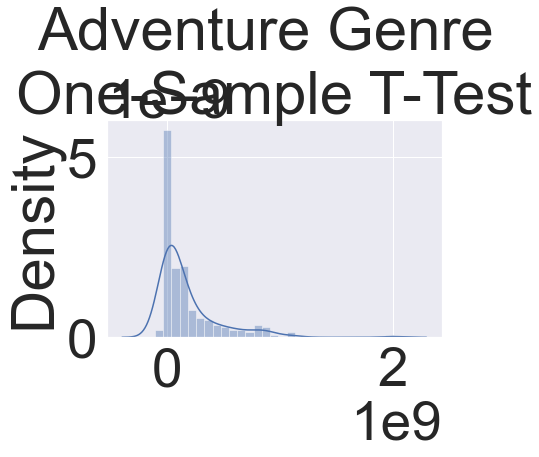

In [65]:
plt.title("Adventure Genre \nOne-Sample T-Test")
one_sample_ttest(adventure_test, popmean, alpha)

C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(Ttest_1sampResult(statistic=1.7202204134764614, pvalue=0.10082938682548488),
 1.7247182429207857)

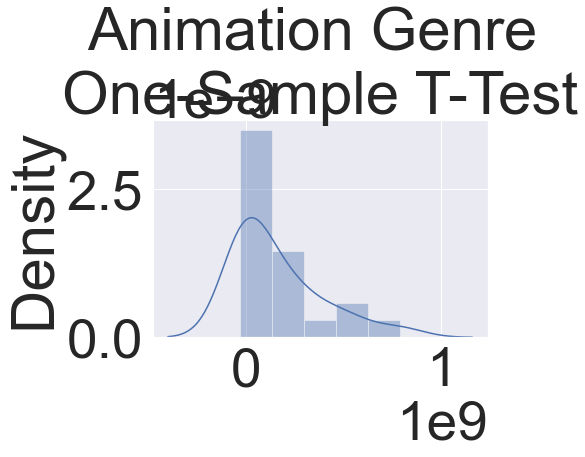

In [66]:
plt.title("Animation Genre \nOne-Sample T-Test")
one_sample_ttest(animation_test, popmean, alpha)

In [67]:
sport_profit = test.loc[test['genres'] == 'Sport']
sport_test = sport_profit['profit'].array
sport_test

<PandasArray>
[29562568, -24219674]
Length: 2, dtype: int64

C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(Ttest_1sampResult(statistic=-2.6133665918216304, pvalue=0.23265843580846798),
 6.313751514800932)

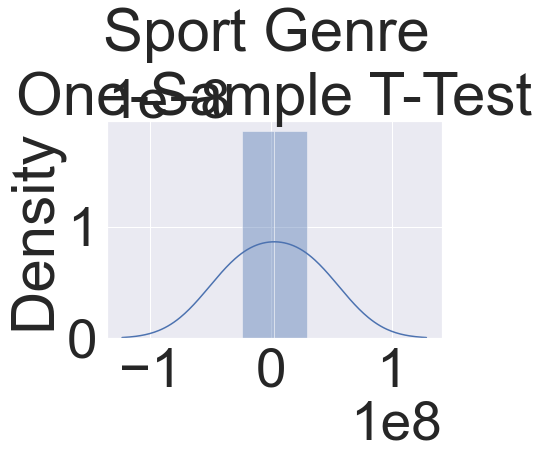

In [68]:
plt.title("Sport Genre \nOne-Sample T-Test")
one_sample_ttest(sport_test, popmean, alpha)


In [69]:
family_profit = test.loc[test['genres'] == 'Family']
family_test = family_profit['profit'].array
family_test

<PandasArray>
[24436778, -250000, -350000, -480200, -5000000, -6435852, -10405045]
Length: 7, dtype: int64

C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Family Genre \nOne-Sample T-Test')

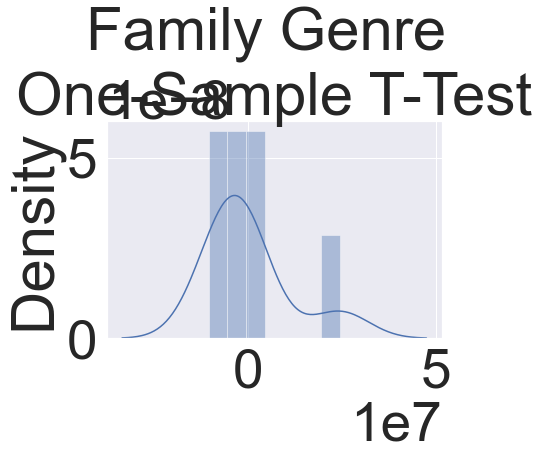

In [70]:
one_sample_ttest(family_test, popmean, alpha)
plt.title("Family Genre \nOne-Sample T-Test")

In [71]:
musical_profit = test.loc[test['genres'] == 'Musical']
musical_profit
#musical_test = musical_profit['profit'].array


,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director,profit
index,,,,,,,,
Cinderella,13,"Mar 13, 2015",95000000,201151353,534551353,Musical,Brad Dalton,439551353
My Fair Lady,71,"Oct 22, 1964",17000000,72000000,72071636,Musical,Razvan Dinca,55071636
The Covenant,83,"Sep 8, 2006",20000000,23364784,38164784,Musical,Robert Muren,18164784
Standing Ovation,11,"Jul 16, 2010",5600000,531806,531806,Musical,Stewart Raffill,-5068194


C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genres', ylabel='profit'>

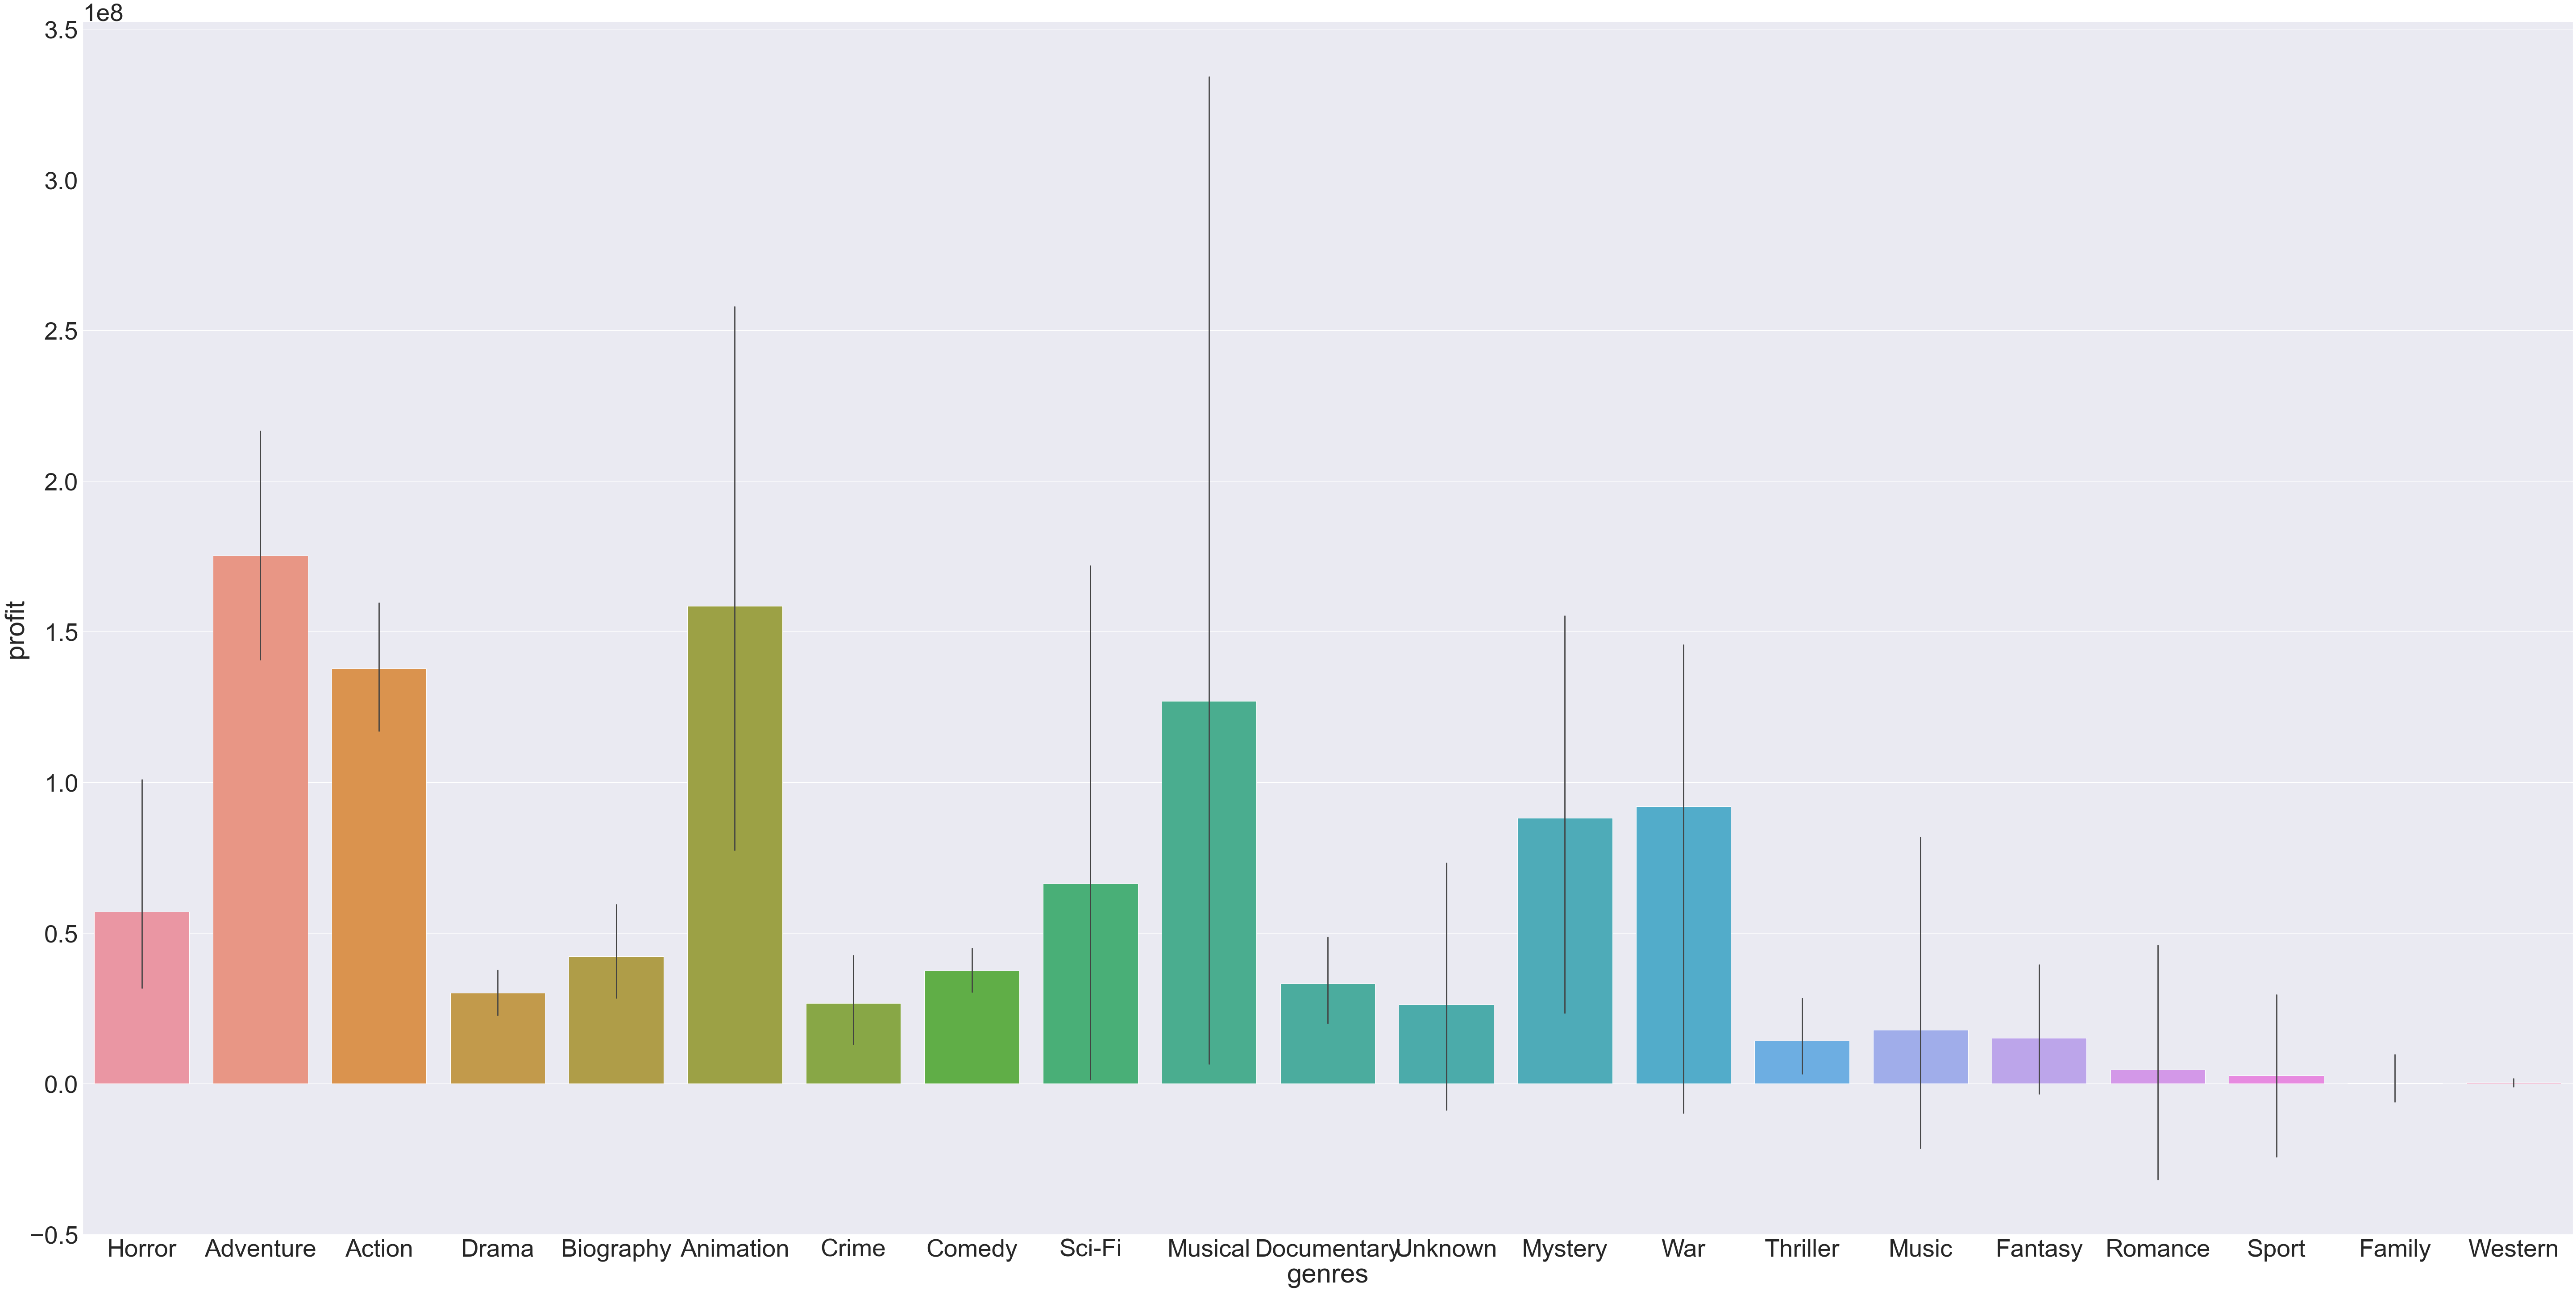

In [72]:
plt.figure(figsize=(100,50))
sns.set_theme(font_scale=5)
sns.barplot(joins['genres'], joins['profit'])

In [73]:
g_test = joins[(['genres','profit'])].copy()
g_test = g_test.sort_values('genres', ascending=True)
g_test.loc[g_test['genres'] == 'Action']

,genres,profit
index,,
Valentine,Action,10384136
Assassins,Action,33306268
Colombiana,Action,32295262
Mile 22,Action,31295121
Here Comes the Boom,Action,31239258
...,...,...
San Andreas,Action,346258539
X-Men: Apocalypse,Action,364537546
King Kong,Action,343517357


Text(0, 0.5, 'Profit in Hundreds of Millions')

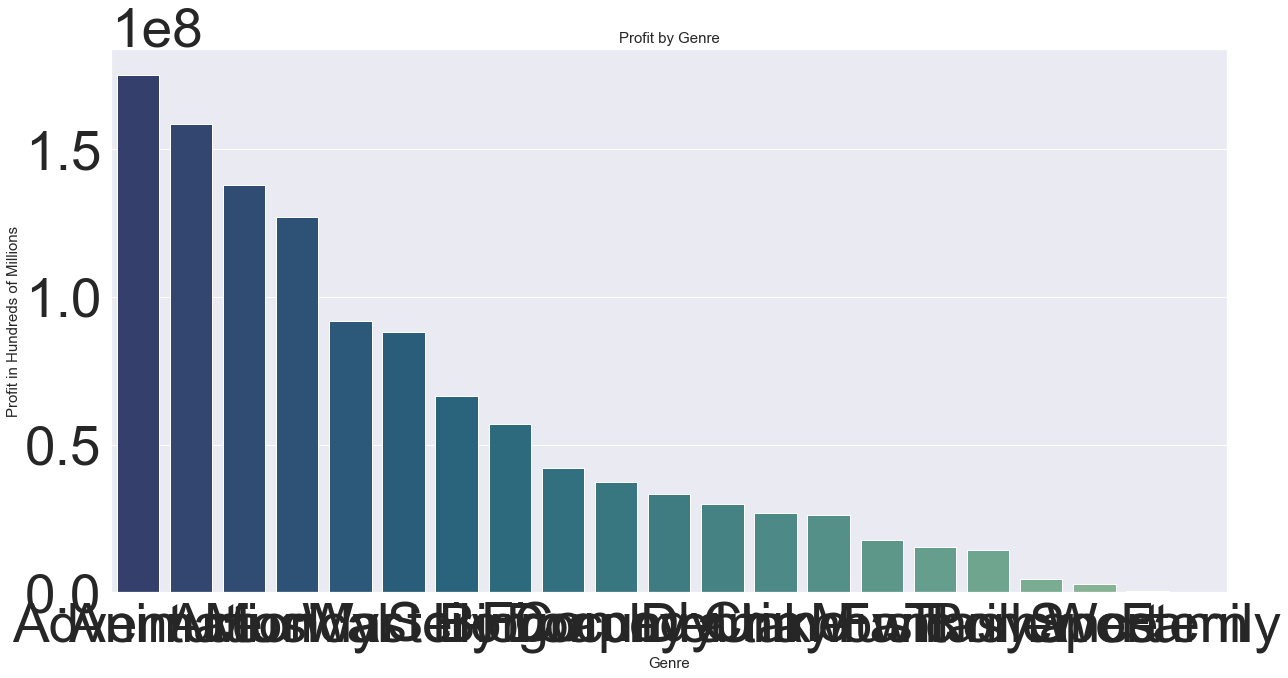

In [74]:
plt.figure(figsize=(20,10))
result = g_test.groupby(["genres"])['profit'].aggregate(np.mean).reset_index().sort_values('profit',ascending=False)
sns.barplot(data=g_test, x= 'genres', y = 'profit', ci=None, palette='crest_r', order=result['genres'])
plt.title("Profit by Genre", fontdict={'fontsize': 15})
plt.xlabel("Genre", fontdict={'fontsize': 15})
plt.ylabel("Profit in Hundreds of Millions", fontdict={'fontsize': 15})

C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genres', ylabel='profit'>

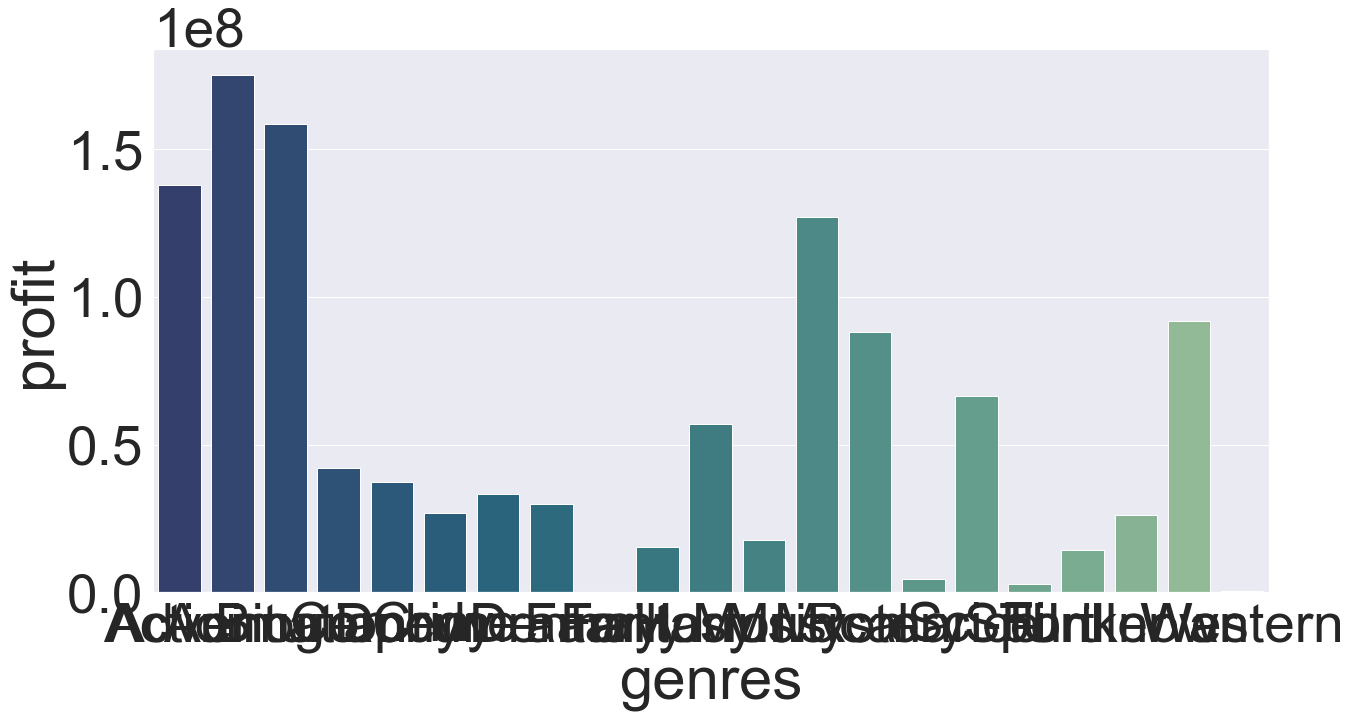

In [75]:
plt.figure(figsize=(20,10))
sns.barplot(g_test['genres'], g_test["profit"], ci=None, palette='crest_r')

C:\Users\ztillery\Anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genres', ylabel='profit'>

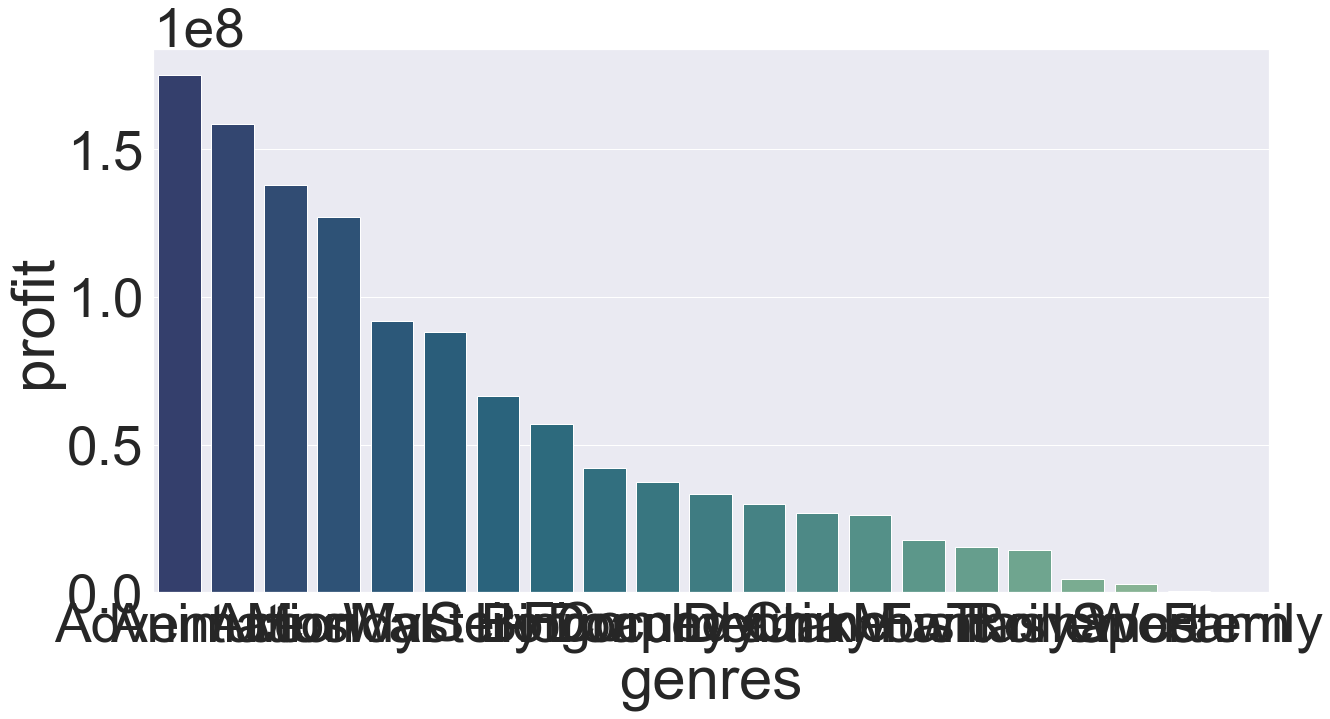

In [76]:
plt.figure(figsize=(20,10))
result = g_test.groupby(["genres"])['profit'].aggregate(np.mean).reset_index().sort_values('profit',ascending=False)
sns.barplot(g_test['genres'], g_test["profit"], ci=None, palette='crest_r',order=result['genres'])

In [77]:
test2 = joins.copy()
test2 = test2[(['genres','profit'])]
test2

,genres,profit
index,,
Avatar,Horror,2351345279
Titanic,Adventure,2008208395
Avengers: Infinity War,Action,1748134200
Jurassic World,Action,1433854864
Furious 7,Action,1328722794
...,...,...
Call of the Wild,Adventure,-82000000
Bright,Action,-90000000
Men in Black: International,Action,-106900000


In [78]:
test2 = test2.sort_values(['profit']).reset_index(drop=True)
test2

,genres,profit
0,Action,-200237650
1,Adventure,-110450242
2,Action,-106900000
3,Action,-90000000
4,Adventure,-82000000
...,...,...
2293,Action,1328722794
2294,Action,1433854864
2295,Action,1748134200
2296,Adventure,2008208395


In [79]:
result = test2.groupby(["genres"])['profit'].aggregate(np.mean).reset_index().sort_values('profit')
result

,genres,profit
8,Family,2.165259e+05
20,Western,3.421035e+05
16,Sport,2.671447e+06
14,Romance,4.626414e+06
17,Thriller,1.418892e+07
9,Fantasy,1.519411e+07
11,Music,1.779418e+07
18,Unknown,2.630909e+07
5,Crime,2.676004e+07
7,Drama,3.003964e+07


In [80]:
advent = test2.loc[test2['genres'] == 'Adventure']
advent

,genres,profit
1,Adventure,-110450242
4,Adventure,-82000000
17,Adventure,-49800000
35,Adventure,-35851512
40,Adventure,-34421457
...,...,...
2277,Adventure,906914868
2281,Adventure,959727750
2287,Adventure,1086336173
2289,Adventure,1122469910
